In [36]:
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import manifold,datasets

df = pd.read_csv('trb_vdj_kmer_mhc.csv')

In [37]:
grouped_df = df.groupby(['cdr3','crd3_encode', 'j.segm', 'v.seg', 'mhc.a', 'mhc.b',
                         'v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
                         'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3',
                         'mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class', 'antigen.epitope', 'antigen_label']).max()['vdjdb.score']
df = grouped_df.reset_index()
df = df.drop_duplicates()

In [38]:
df_vdj = df[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
df_mhc = df[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label']]

vdj_lists = df_vdj.values.tolist()
mhc_lists = df_mhc.values.tolist()

In [39]:
df['antigen.epitope'].nunique()

1099

In [40]:
import ast
cdr3_kmer = df['crd3_encode'].apply(lambda x: ast.literal_eval(x))

In [41]:
tcr_list = []
for cdr3, vdj, mhc in zip(cdr3_kmer, vdj_lists, mhc_lists):
    tcr_list.append(cdr3 + vdj + mhc)
tcr_list[0]

[-1.7861062288284302,
 -2.171077013015747,
 -0.5743247270584106,
 -0.9145145416259766,
 1.0499252080917358,
 -0.32020965218544006,
 1.1796002388000488,
 1.1211237907409668,
 0.5879757404327393,
 -0.048262130469083786,
 -0.3980541527271271,
 0.16776765882968903,
 -0.004452385939657688,
 0.049546968191862106,
 0.6691069006919861,
 -0.36690548062324524,
 0.3081017732620239,
 0.026593893766403198,
 0.11395345628261566,
 -0.3580017387866974,
 -0.5532325506210327,
 0.2518041729927063,
 -0.23870128393173218,
 0.228237584233284,
 0.06215957552194595,
 -0.7140744924545288,
 0.21667292714118958,
 0.028236649930477142,
 -0.30602914094924927,
 0.2872357964515686,
 0.10574838519096375,
 0.2239576280117035,
 -0.28640541434288025,
 0.062230221927165985,
 0.9601805806159973,
 -0.00032441155053675175,
 0.41570615768432617,
 -0.3392747938632965,
 -0.22030995786190033,
 -0.36369383335113525,
 -0.7883431315422058,
 -0.42689049243927,
 -0.26208949089050293,
 1.0642751455307007,
 1.5167229175567627,
 0.1957

In [42]:
antigen_label = df['antigen_label'].tolist()
type(antigen_label)

list

In [43]:
type(tcr_list[0])

list

In [44]:
cdr3_kmer = list(cdr3_kmer)

In [45]:
##########PCA#############

pca = PCA(n_components = 100)
pca_data = pca.fit_transform(list(cdr3_kmer))

In [46]:
# tcr_list = []
# for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
#     tcr_list.append(cdr3 + vdj + mhc)
tcr_list = []
for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
    combined_array = np.concatenate([cdr3, vdj, mhc])
    tcr_list.append(combined_array)


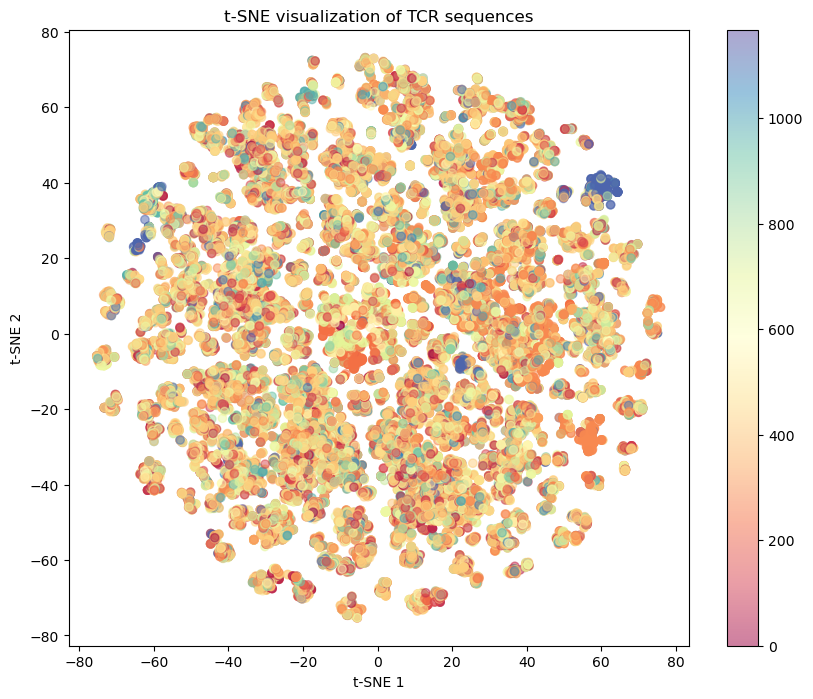

In [47]:
from sklearn.manifold import TSNE

tcr_array = np.array(tcr_list)

# Initialize t-SNE with 2 components (2 dimensions)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

tsne_results = tsne.fit_transform(tcr_array)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=antigen_label, cmap='Spectral', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of TCR sequences')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [48]:
############TSNE##########
tcr_array = np.array(tcr_list)
tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=100)
reduced_data = tsne.fit_transform(tcr_array)

### DBSCAN algorithm with min_samples=10 was selected for clustering

In [49]:
from sklearn.cluster import DBSCAN

dbscan_tsne = DBSCAN(eps=0.5, min_samples=20)
dbscan_tsne_labels = dbscan_tsne.fit_predict(reduced_data)

unique_tsne_labels = np.unique(dbscan_tsne_labels)
print(f"Unique labels found: {unique_tsne_labels}")

Unique labels found: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 2

### Visualization of Clusters

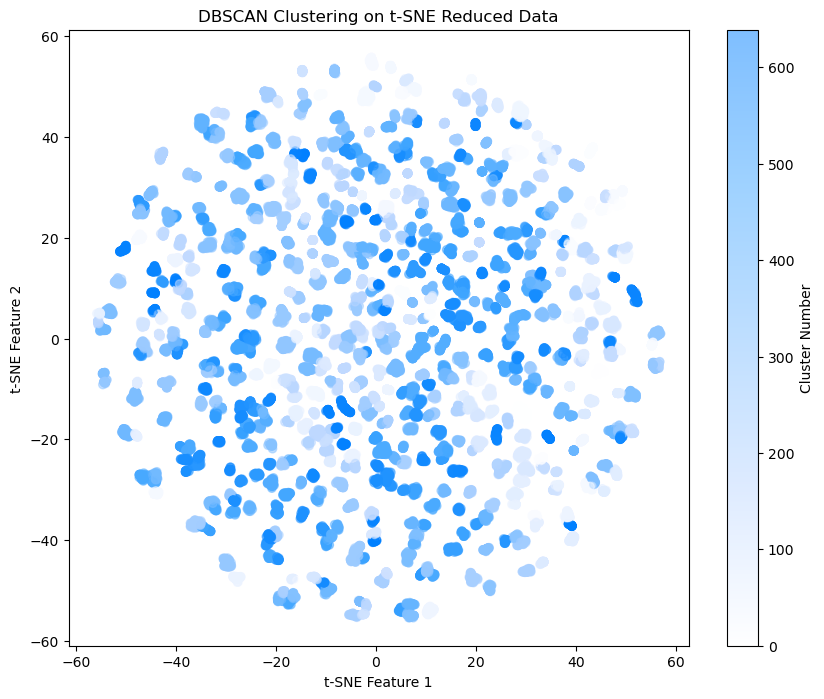

In [50]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 1, 1), (0.75, 0.85, 1), (0.5, 0.75, 1), (0.25, 0.65, 1), (0, 0.5, 1)]  # 这里定义了从白色到蓝色的渐变
n_bins = len(unique_tsne_labels) - 1 
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[dbscan_tsne_labels != -1, 0],
                      reduced_data[dbscan_tsne_labels != -1, 1],
                      c=dbscan_tsne_labels[dbscan_tsne_labels != -1],
                      cmap=cm, alpha=0.5)

colorbar = plt.colorbar(scatter, spacing='proportional')
colorbar.set_label('Cluster Number')
plt.title('DBSCAN Clustering on t-SNE Reduced Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

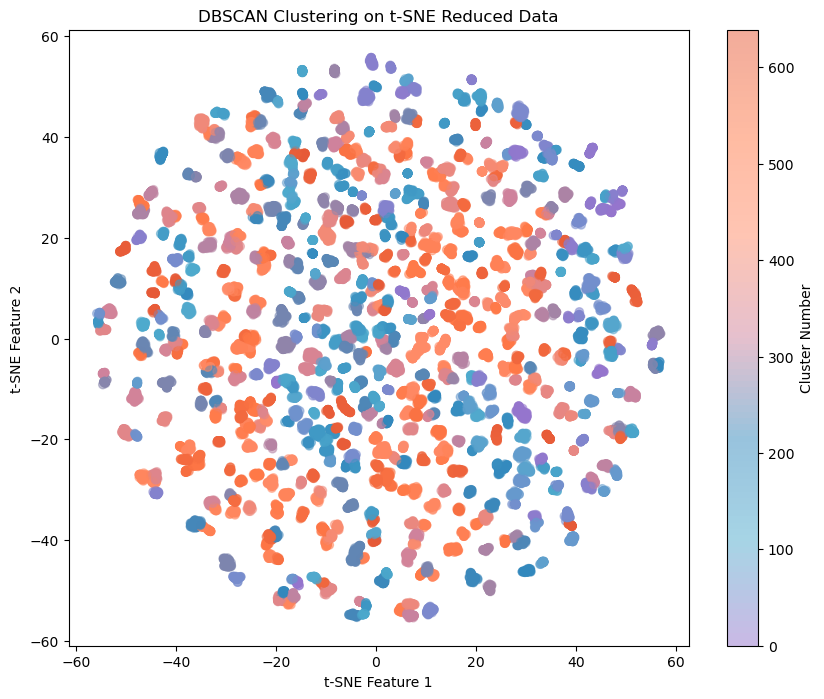

In [57]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

colors = [
    (149/255, 117/255, 205/255),  # darker purple
    (79/255, 171/255, 205/255),   # darker blue
    (50/255, 136/255, 189/255),   # deeper aqua
    (205/255, 130/255, 158/255),  # darker peach
    (255/255, 140/255, 105/255),  # darker light orange
    (255/255, 120/255, 70/255),   # darker orange
    (230/255, 90/255, 55/255)     # deepest orange
]
cmap_name = 'custom_tSNE'
n_bins = 100  
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_data[dbscan_tsne_labels != -1, 0],  
    reduced_data[dbscan_tsne_labels != -1, 1],  
    c=dbscan_tsne_labels[dbscan_tsne_labels != -1],  
    cmap=cm,  
    alpha=0.5 
)

colorbar = plt.colorbar(scatter, spacing='proportional')
colorbar.set_label('Cluster Number')

plt.title('DBSCAN Clustering on t-SNE Reduced Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Display the plot
plt.show()


In [61]:
from sklearn.metrics import silhouette_score

filtered_labels = dbscan_tsne_labels[dbscan_tsne_labels != -1]
filtered_data = reduced_data[dbscan_tsne_labels != -1]

if len(np.unique(filtered_labels)) > 1: 
    score = silhouette_score(filtered_data, filtered_labels)
    print(f'Silhouette Score: {score}')
else:
    print('Silhouette score cannot be calculated for a single cluster.')


Silhouette Score: 0.7403883934020996
